## **Set Up**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df_sales = pd.read_excel('/content/gdrive/Shareddrives/X2 A PLUS/FDA/Source Code/AdventureWorksSales.xlsx', sheet_name='Sales_data')
df_sales_order = pd.read_excel('/content/gdrive/Shareddrives/X2 A PLUS/FDA/Source Code/AdventureWorksSales.xlsx', sheet_name='Sales Order_data')
df_date = pd.read_excel('/content/gdrive/Shareddrives/X2 A PLUS/FDA/Source Code/AdventureWorksSales.xlsx', sheet_name='Date_data')
df_product = pd.read_excel('/content/gdrive/Shareddrives/X2 A PLUS/FDA/Source Code/AdventureWorksSales.xlsx', sheet_name='Product_data')
df_customer = pd.read_excel('/content/gdrive/Shareddrives/X2 A PLUS/FDA/Source Code/AdventureWorksSales.xlsx', sheet_name='Customer_data')
df_territory = pd.read_excel('/content/gdrive/Shareddrives/X2 A PLUS/FDA/Source Code/AdventureWorksSales.xlsx', sheet_name='Sales Territory_data')
df_reseller = pd.read_excel('/content/gdrive/Shareddrives/X2 A PLUS/FDA/Source Code/AdventureWorksSales.xlsx', sheet_name='Reseller_data')

In [ ]:
df_date = df_date.rename(columns = {'DateKey':'OrderDateKey'})
df_reseller = df_reseller.rename(columns = {'SalesOrderLineKey': 'ResellerKey'})

# **Understanding data**

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SalesOrderLineKey        121253 non-null  float64
 1   ResellerKey              121253 non-null  float64
 2   CustomerKey              121253 non-null  float64
 3   ProductKey               121253 non-null  float64
 4   OrderDateKey             121253 non-null  float64
 5   DueDateKey               121253 non-null  float64
 6   ShipDateKey              119140 non-null  float64
 7   SalesTerritoryKey        121253 non-null  float64
 8   Order Quantity           121253 non-null  float64
 9   Unit Price               121253 non-null  float64
 10  Extended Amount          121253 non-null  float64
 11  Unit Price Discount Pct  121253 non-null  float64
 12  Product Standard Cost    121253 non-null  float64
 13  Total Product Cost       121253 non-null  float64
 14  Sale

In [ ]:
df_sales_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Channel            121253 non-null  object 
 1   SalesOrderLineKey  121253 non-null  float64
 2   Sales Order        121253 non-null  object 
 3   Sales Order Line   121253 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.7+ MB


In [ ]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderDateKey    1461 non-null   float64       
 1   Date            1461 non-null   datetime64[ns]
 2   Fiscal Year     1461 non-null   object        
 3   Fiscal Quarter  1461 non-null   object        
 4   Month           1461 non-null   object        
 5   Full Date       1461 non-null   object        
 6   MonthKey        1461 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 80.0+ KB


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductKey     397 non-null    float64
 1   SKU            397 non-null    object 
 2   Product        397 non-null    object 
 3   Standard Cost  397 non-null    float64
 4   Color          341 non-null    object 
 5   List Price     397 non-null    float64
 6   Model          397 non-null    object 
 7   Subcategory    397 non-null    object 
 8   Category       397 non-null    object 
dtypes: float64(3), object(6)
memory usage: 28.0+ KB


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18485 entries, 0 to 18484
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerKey     18485 non-null  float64
 1   Customer ID     18485 non-null  object 
 2   Customer        18485 non-null  object 
 3   City            18485 non-null  object 
 4   State-Province  18485 non-null  object 
 5   Country-Region  18485 non-null  object 
 6   Postal Code     18485 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1011.0+ KB


In [ ]:
df_territory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SalesTerritoryKey  11 non-null     float64
 1   Region             11 non-null     object 
 2   Country            11 non-null     object 
 3   Group              11 non-null     object 
dtypes: float64(1), object(3)
memory usage: 480.0+ bytes


In [ ]:
df_reseller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ResellerKey     702 non-null    float64
 1   Reseller ID     702 non-null    object 
 2   Business Type   702 non-null    object 
 3   Reseller        702 non-null    object 
 4   City            702 non-null    object 
 5   State-Province  702 non-null    object 
 6   Country-Region  702 non-null    object 
 7   Postal Code     702 non-null    object 
dtypes: float64(1), object(7)
memory usage: 44.0+ KB


In [ ]:
df_merge = df_sales.merge(df_sales_order, on='SalesOrderLineKey', how='left')
df_merge = df_merge.merge(df_date, on='OrderDateKey', how = 'left')
df_merge = df_merge.merge(df_product, on='ProductKey', how = 'left')
df_merge = df_merge.merge(df_customer, on='CustomerKey', how = 'left')
df_merge = df_merge.merge(df_territory, on='SalesTerritoryKey', how = 'left')
df_merge = df_merge.merge(df_reseller, on='ResellerKey', how = 'left')

In [ ]:
df_merge = df_merge.drop(columns =['City_y','State-Province_y','Country-Region_y','Postal Code_y']).rename(columns = {'City_x':'City', 'State-Province_x' : 'State-Province'
, 'Country-Region_x':'Country-Region', 'Postal Code_x':'Postal Code'})

## **Data Colection**

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121253 entries, 0 to 121252
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   SalesOrderLineKey        121253 non-null  float64       
 1   ResellerKey              121253 non-null  float64       
 2   CustomerKey              121253 non-null  float64       
 3   ProductKey               121253 non-null  float64       
 4   OrderDateKey             121253 non-null  float64       
 5   DueDateKey               121253 non-null  float64       
 6   ShipDateKey              119140 non-null  float64       
 7   SalesTerritoryKey        121253 non-null  float64       
 8   Order Quantity           121253 non-null  float64       
 9   Unit Price               121253 non-null  float64       
 10  Extended Amount          121253 non-null  float64       
 11  Unit Price Discount Pct  121253 non-null  float64       
 12  Product Standard

In [ ]:
df_merge.describe()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount,MonthKey,Standard Cost,List Price
count,1.212530e+05,121253.000000,121253.000000,121253.000000,1.212530e+05,1.212530e+05,1.191400e+05,121253.000000,121253.000000,121253.000000,121253.000000,121253.0,121253.000000,121253.000000,121253.000000,121253.000000,121253.000000,121253.000000
mean,5.782642e+07,170.043430,9384.833868,424.884094,2.019158e+07,2.019183e+07,2.019159e+07,5.410035,2.266138,465.180515,909.971564,0.0,362.643598,802.107230,905.621091,201915.636124,362.643598,619.342984
std,9.009990e+06,224.536697,10171.582167,116.978898,7.981850e+03,8.021172e+03,7.990125e+03,2.835858,2.491806,752.041893,1705.565586,0.0,541.688873,1660.416044,1693.746343,79.824722,541.688873,913.694200
min,4.365900e+07,-1.000000,-1.000000,212.000000,2.017070e+07,2.017071e+07,2.017071e+07,1.000000,1.000000,1.328200,1.374000,0.0,0.856500,0.856500,1.374000,201707.000000,0.856500,2.290000
25%,4.987905e+07,-1.000000,-1.000000,339.000000,2.019041e+07,2.019042e+07,2.019041e+07,4.000000,1.000000,21.490000,24.990000,0.0,9.159300,10.842300,24.990000,201904.000000,9.159300,24.490000
50%,5.702800e+07,3.000000,-1.000000,470.000000,2.019101e+07,2.019102e+07,2.019101e+07,6.000000,1.000000,49.990000,134.982000,0.0,38.492300,98.983600,134.982000,201910.000000,38.492300,63.500000
75%,6.549000e+07,327.000000,18116.000000,528.000000,2.020022e+07,2.020030e+07,2.020022e+07,8.000000,3.000000,602.346000,1120.490000,0.0,486.706600,999.259500,1120.490000,202002.000000,486.706600,782.990000
max,7.512300e+07,701.000000,29483.000000,606.000000,2.020062e+07,2.020062e+07,2.020062e+07,10.000000,44.000000,3578.270000,30992.910000,0.0,2171.294200,38530.385400,27893.619000,202006.000000,2171.294200,3578.270000


In [ ]:
df_rfm = df_merge.iloc[:,[18,16,14]]
df_rfm.head()

,Date,Sales Order,Sales Amount
0,2017-07-02,SO43659,2024.994
1,2017-07-02,SO43659,6074.982
2,2017-07-02,SO43659,2024.994
3,2017-07-02,SO43659,2039.994
4,2017-07-02,SO43659,2039.994


In [ ]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121253 entries, 0 to 121252
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          121253 non-null  datetime64[ns]
 1   Sales Order   121253 non-null  object        
 2   Sales Amount  121253 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.7+ MB


### Eliminate null data and NA

In [ ]:
df_rfm = df_rfm.dropna()
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121253 entries, 0 to 121252
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          121253 non-null  datetime64[ns]
 1   Sales Order   121253 non-null  object        
 2   Sales Amount  121253 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
df_rfm = df_rfm.isnull()
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121253 entries, 0 to 121252
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Date          121253 non-null  bool 
 1   Sales Order   121253 non-null  bool 
 2   Sales Amount  121253 non-null  bool 
dtypes: bool(3)
memory usage: 1.3 MB


In [ ]:
df_merge = df_merge[(df_merge['CustomerKey'] != -1)]
df_rfm = df_merge.iloc[:,[18,16,14]]
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60398 entries, 60855 to 121252
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          60398 non-null  datetime64[ns]
 1   Sales Order   60398 non-null  object        
 2   Sales Amount  60398 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
df_retention = df_merge.iloc[:,[2,18]]
df_retention.head(100)

,CustomerKey,Date
60855,21768.0,2017-07-01
60856,28389.0,2017-07-01
60857,25863.0,2017-07-01
60858,14501.0,2017-07-01
60859,11003.0,2017-07-01
...,...,...
60950,16623.0,2017-07-12
60951,11000.0,2017-07-12
60952,11029.0,2017-07-12
60953,27615.0,2017-07-13


In [ ]:
df_cohort = df_rfm.copy()

# **Data visualization**

In [ ]:
df_eda = df_merge.iloc[:,[31, 36, 38, 39, 40, 42]]

Text(0.5, 1.0, 'Orders Quantity By Country')

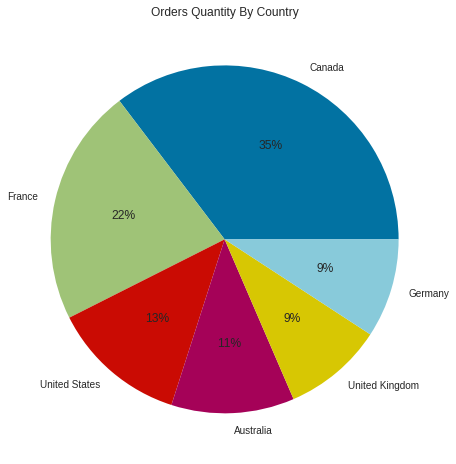

In [ ]:
plt.figure(figsize=(15,8))
countries_pie = df_eda['Country-Region'].value_counts()
plt.pie(countries_pie, autopct='%.0f%%', labels = pd.unique(pd.Series(df_eda['Country-Region'].values)))
plt.title('Orders Quantity By Country')

Text(0.5, 1.0, 'Amount Of Each Category In Countries')

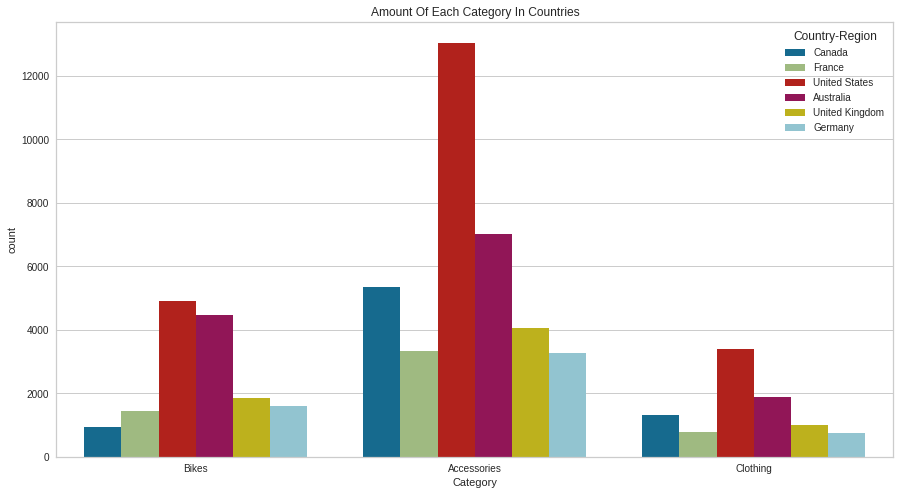

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x=df_eda['Category'], hue=df_eda['Country-Region'])
plt.title('Amount Of Each Category In Countries')

Text(0.5, 1.0, 'Number of Orders Each Territory')

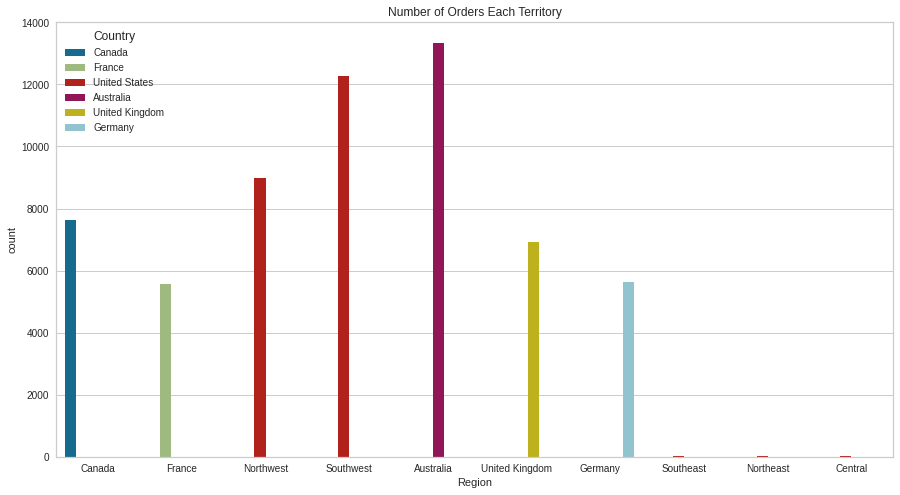

In [ ]:
  plt.figure(figsize=(15,8))
  sns.countplot(x=df_eda['Region'], hue=df_eda['Country'])
  plt.title('Number of Orders Each Territory')

In [ ]:
fig1 = px.bar(df_merge[['Date','Sales Order']].set_index('Date').resample('M').count().reset_index(),
       x='Date', y='Sales Order', title = 'Number of Sales Order per month')
fig1.show()

In [ ]:
fig2 = px.line(df_merge[['Date','Sales Amount']].set_index('Date').resample('M').sum().reset_index(),
       x='Date', y='Sales Amount', title = 'Total of Sales Amount per month', markers=True)
fig2.show()

# **Calculating RFM**

In [ ]:
current_date = max(df_merge['Date']) + dt.timedelta(days=1)

df_rfm = df_merge.groupby(['CustomerKey']).agg(
    {'Date': lambda x: (current_date- x.max()).days,
     'Sales Order':pd.Series.nunique,
     'Sales Amount':'sum'
     }
)

In [ ]:
df_rfm = df_rfm.rename(columns = {'Date':'Recency',
                         'Sales Order': 'Frequency',
                         'Sales Amount': 'Monetary'})

In [ ]:
df_rfm.head(10)

,Recency,Frequency,Monetary
CustomerKey,,,
11000.0,256,3,8248.99
11001.0,35,3,6383.88
11002.0,325,3,8114.04
11003.0,249,3,8139.29
11004.0,258,3,8196.01
11005.0,257,3,8121.33
11006.0,245,3,8119.03
11007.0,301,3,8211.00
11008.0,318,3,8106.31


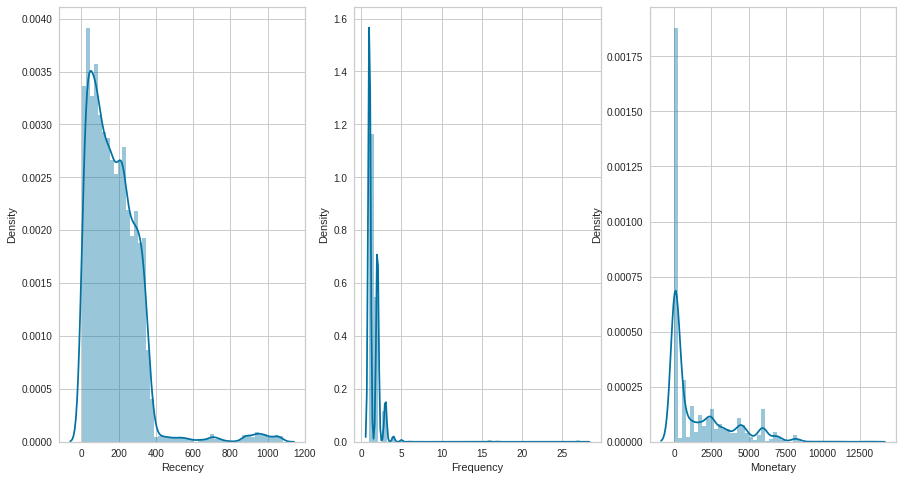

In [ ]:
#Distribution plot of R,F,M before removing outliers
fig, ax = plt.subplots(1,3, figsize= (15,8))
sns.distplot(df_rfm['Recency'], hist = True, ax = ax[0])
sns.distplot(df_rfm['Frequency'], hist = True, ax = ax[1])
sns.distplot(df_rfm['Monetary'], hist = True, ax = ax[2])
plt.show()

In [ ]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18484 entries, 11000.0 to 29483.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    18484 non-null  int64  
 1   Frequency  18484 non-null  int64  
 2   Monetary   18484 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 577.6 KB


# **Trực quan hóa dữ liệu**

Data before removing outliers


In [ ]:
def plot_Boxplot(features_set, df):
  plt.rcParams["figure.figsize"] = (20,5)
  fig, axs = plt.subplots(1, len(features))
  cnt = 0
  for i in range(len(features)):
    axs[i].boxplot(df[features[cnt]])
    axs[i].set_title('distribution of '+ features[cnt])
    cnt +=1

In [ ]:
features = ['Recency', 'Frequency', 'Monetary']

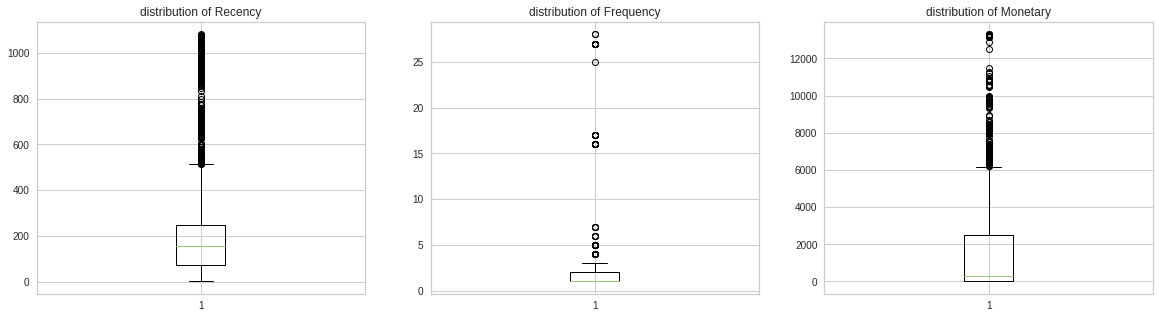

In [ ]:
plot_Boxplot(features, df_rfm)

In [ ]:
def plot_Hist(features, df):
  plt.rcParams["figure.figsize"] = (20,5)
  fig, axs = plt.subplots(1, len(features))
  cnt = 0
  for i in range(len(features)):
    axs[i].hist(df[features[cnt]])
    axs[i].set_title('Distribution of '+ features[cnt])
    cnt +=1

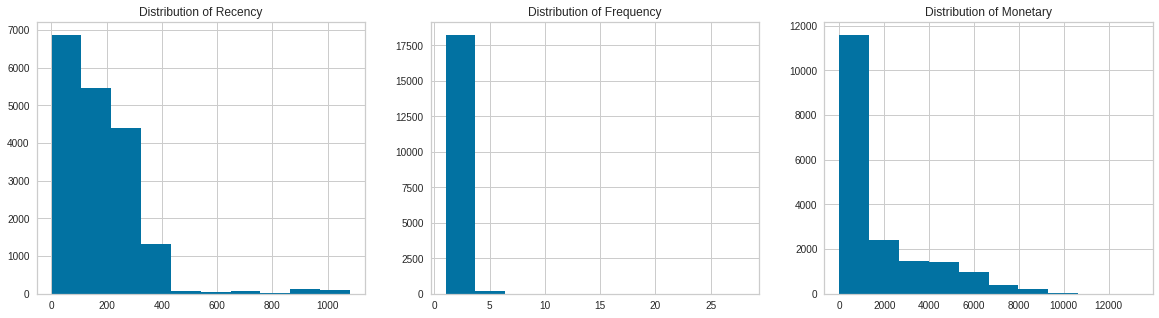

In [ ]:
plot_Hist(features, df_rfm)

# **Loại bỏ outliers**

In [ ]:
print(df_rfm.Recency.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    18484.000000
mean       175.667983
std        145.644062
min          1.000000
25%         72.000000
50%        154.000000
75%        249.000000
85%        298.000000
90%        322.000000
100%      1081.000000
max       1081.000000
Name: Recency, dtype: float64


In [ ]:
print(df_rfm.Frequency.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    18484.000000
mean         1.496375
std          1.101139
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
85%          2.000000
90%          2.000000
100%        28.000000
max         28.000000
Name: Frequency, dtype: float64


In [ ]:
print(df_rfm.Monetary.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    18484.000000
mean      1588.329216
std       2124.231717
min          2.290000
25%         49.970000
50%        270.265000
75%       2511.275000
85%       4337.560000
90%       4826.839000
100%     13295.380000
max      13295.380000
Name: Monetary, dtype: float64


In [ ]:
def outliers(df,col):
  q1 = np.quantile(df[col], 0.25)
  q3 = np.quantile(df[col], 0.75)
  iqr = q3 - q1
  upper_bound = q3 + (1.5*iqr)
  lower_bound = q1 - (1.5*iqr)
  ls = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return ls

In [ ]:
R_outliers, F_outliers, M_outliers = outliers(df_rfm, 'Recency').array, outliers(df_rfm, 'Frequency').array, outliers(df_rfm, 'Monetary').array

outliers_index = np.concatenate([R_outliers, F_outliers, M_outliers])

rfm_normal = df_rfm.drop(outliers_index)

In [ ]:
rfm_normal.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 17248 entries, 11012.0 to 29483.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    17248 non-null  int64  
 1   Frequency  17248 non-null  int64  
 2   Monetary   17248 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 539.0 KB


Data after removing outliers


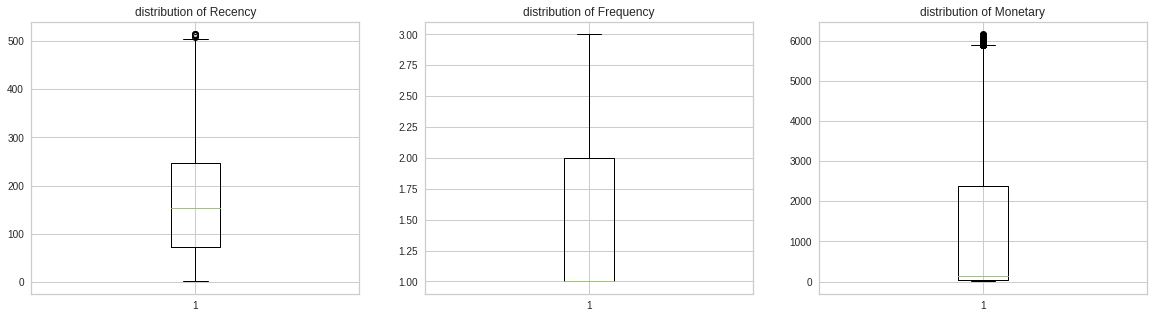

In [ ]:
plot_Boxplot(features, rfm_normal)

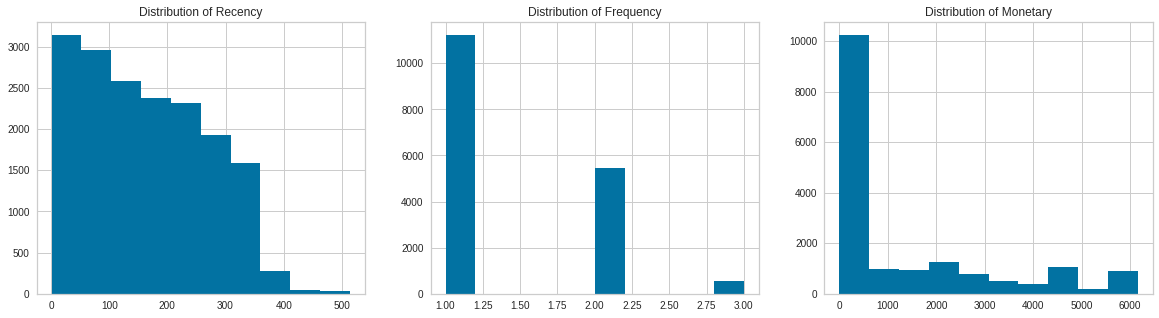

In [ ]:
plot_Hist(features, rfm_normal)

# **Chuẩn hóa dữ liệu**

Xem phân phối dữ liệu

In [ ]:
def analyze_skewness(x):
  fig, ax = plt.subplots(2, 2, figsize=(5,5))
  sns.distplot(rfm_normal[x], ax=ax[0,0])
  sns.distplot(np.log(rfm_normal[x]), ax=ax[0,1])
  sns.distplot(np.sqrt(rfm_normal[x]), ax=ax[1,0])
  sns.distplot(stats.boxcox(rfm_normal[x])[0], ax=ax[1,1])
  plt.tight_layout()
  plt.show()

  print(rfm_normal[x].skew().round(2))
  print(np.log(rfm_normal[x]).skew().round(2))
  print(np.sqrt(rfm_normal[x]).skew().round(2))
  print(pd.Series(stats.boxcox(rfm_normal[x])[0]).skew().round(2))

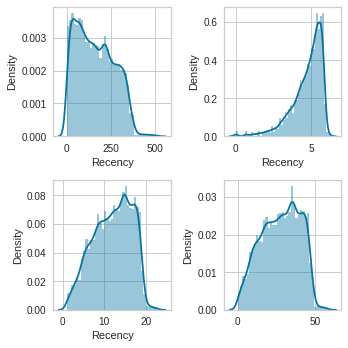

0.31
-1.48
-0.29
-0.2


In [ ]:
analyze_skewness('Recency')

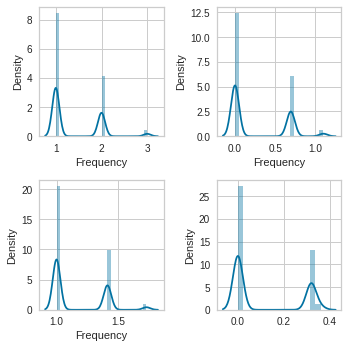

1.07
0.79
0.9
0.64


In [ ]:
analyze_skewness('Frequency')

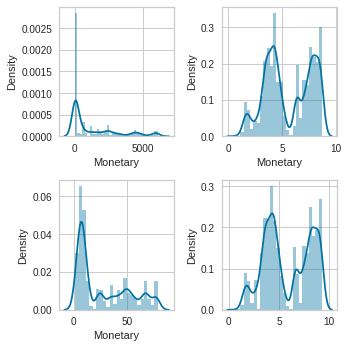

1.28
-0.04
0.71
-0.01


In [ ]:
analyze_skewness('Monetary')

Chuyển đổi dữ liệu về thang đo boxcox

In [ ]:
df_trans = pd.DataFrame()
df_trans['Recency'] = stats.boxcox(rfm_normal['Recency'])[0]
df_trans['Frequency'] = stats.boxcox(rfm_normal['Frequency'])[0]
df_trans['Monetary'] = stats.boxcox(rfm_normal['Monetary'])[0]
df_trans.head(5)

,Recency,Frequency,Monetary
0,20.773902,0.319341,4.537277
1,2.101348,0.319341,4.898032
2,38.881343,0.319341,5.106464
3,47.247871,0.000000,8.273735
4,45.541122,0.000000,8.195771


Tiến hành scale dữ liệu

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# rfm_normal['minmax_R'] = scaler.fit_transform(rfm_normal[['Recency']])
# rfm_normal['minmax_F'] = scaler.fit_transform(rfm_normal[['Frequency']])
# rfm_normal['minmax_M'] = scaler.fit_transform(rfm_normal[['Monetary']])

#Thử cách khác 1
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_trans['minmax_R'] = scaler.fit_transform(df_trans[['Recency']])
# df_trans['minmax_F'] = scaler.fit_transform(df_trans[['Frequency']])
# df_trans['minmax_M'] = scaler.fit_transform(df_trans[['Monetary']])
# df_trans.drop( columns = ['Recency', 'Frequency', 'Monetary'])

# Thử cách khác 2
from sklearn.preprocessing import StandardScaler
df_trans1 = df_trans.copy()
scaler = StandardScaler()
scaler.fit(df_trans)

df_trans = scaler.transform(df_trans)

In [ ]:
df_trans = pd.DataFrame(df_trans)
df_trans.head(5)

,0,1,2
0,-0.557696,1.338898,-0.572651
1,-2.074828,1.338898,-0.416714
2,0.913521,1.338898,-0.326619
3,1.593296,-0.731753,1.042437
4,1.454623,-0.731753,1.008737


In [ ]:
df_trans = df_trans.rename(columns= {0:'Recency', 1:'Frequency', 2:'Monetary'})
df_trans.head(5)

,Recency,Frequency,Monetary
0,-0.557696,1.338898,-0.572651
1,-2.074828,1.338898,-0.416714
2,0.913521,1.338898,-0.326619
3,1.593296,-0.731753,1.042437
4,1.454623,-0.731753,1.008737


# **Elbow**

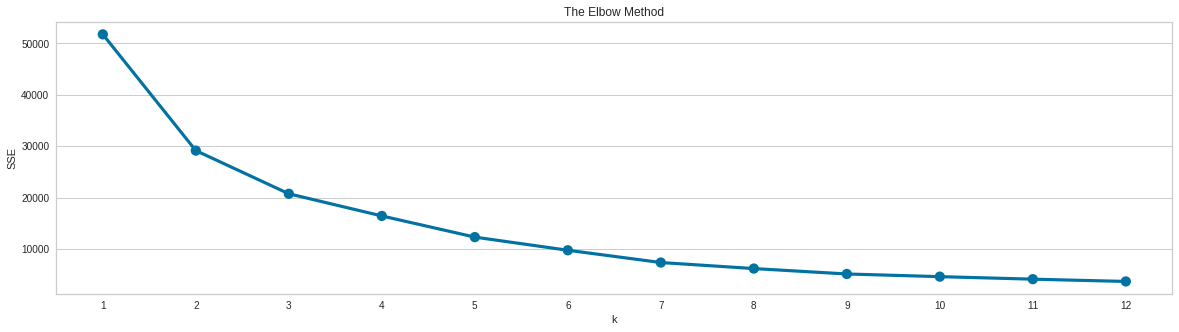

In [ ]:
sse = {}
for k in range(1,13):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_trans)
  sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# **Silhouette**

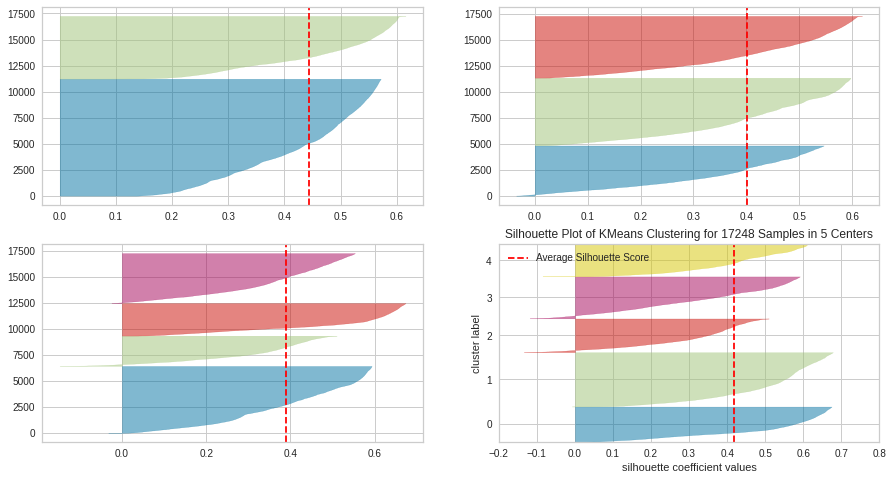

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_trans)

visualizer.show()

In [ ]:
n_clusters= 10
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(df_trans)

In [ ]:
model.fit(df_trans[['Recency','Frequency','Monetary']])
model.labels_

In [ ]:
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(df_trans, model.labels_)

means_lst = []

for label in range(10):
    means_lst.append(sample_silhouette_values[model.labels_ == label].mean())

means_lst

In [ ]:
plt.figure(figsize = (20,15))
plt.plot([1,2,3,4,5,6,7,8,9,10],
[0.4617046164630124,
 0.505572891307772,
 0.4468153388405307,
 0.5043022450978901,
 0.5185271043541558,
 0.5260313876871998,
 0.5002093743393808,
 0.3577032929749282,
 0.425354534676842,
 0.49190138254775884] , 'go-', label= 'Silhoutte curve')
plt.plot([3], [0.4468153388405307], 'ro', label= 'Optimal number of clusters (3)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Coeffient')

plt.legend(loc='best')
plt.show()

# **Biểu đồ phân phối tần suất**

In [ ]:
#Distribution plot of R,F,M after removing outliers
fig, ax = plt.subplots(1,3, figsize= (15,8))
sns.distplot(df_rfm['Recency'], hist = True, ax = ax[0])
sns.distplot(df_rfm['Frequency'], hist = True, ax = ax[1])
sns.distplot(df_rfm['Monetary'], hist = True, ax = ax[2])
plt.show()

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,8))

ax[0].scatter(x= rfm_normal['Frequency'], y= rfm_normal['Recency'])
ax[0].set_xlabel('Correlation between R and F')

ax[1].scatter(x= rfm_normal['Recency'], y= rfm_normal['Monetary'])
ax[1].set_xlabel('Correlation between R and M')

ax[2].scatter(x= rfm_normal['Frequency'], y= rfm_normal['Monetary'])
ax[2].set_xlabel('Correlation between F and M')

# **K-MEANS TÌM RA ĐẶC ĐIỂM CỦA CỤM**

In [ ]:
md=KMeans(n_clusters=3,random_state=42)
md.fit(rfm_normal)

In [ ]:
rfm_normal['Cluster'] =md.labels_
rfm_normal

In [ ]:
rfm_normal.describe()
rfm_normal

In [ ]:
df_mean_c =  rfm_normal.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean',
    }
).round(1)
df_mean_c

In [ ]:
rfm_normal[rfm_normal['Cluster'] == 2].describe()

In [ ]:
percent_clusters = rfm_normal.Cluster.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percent_clusters

In [ ]:
md1 = KMeans(n_clusters =3)
md1.fit(df_trans1)
df_trans1['Labels'] = md1.labels_
df_trans1

In [ ]:
# import plotly.graph_objects as go
# import plotly as py
# df_trans1['labels']= md.labels_
# trace = go.Scatter3d(
#                     x=df_trans1['Recency'],
#                     y=df_trans1['Frequency'],
#                     z=df_trans1['Monetary'],
#                     mode='markers',
#                     marker=dict(color=df_trans1['labels'], size=5, line=dict(color=df_trans1['labels'],width=12),opacity=0.8)
# )
# data=[trace]
# layout= go.Layout(
#                   title = 'Clusters',
#                   scene = dict(
#                                 xaxis= dict(title ='Recency'),
#                                 yaxis= dict(title ='Frequency'),
#                                 zaxis= dict(title='Monetary'))
#                                 )
# fig=go.Figure(data=data, layout=layout)
# py.offline.iplot(fig)
# plt.show()

# **SOM**

In [ ]:
pip install minisom

In [ ]:
from minisom import MiniSom
data = df_trans1.values
data = np.array(data)
som_shape = (1,3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.8, learning_rate=0.01,
              neighborhood_function='gaussian')

som.train_batch(data, 18000, verbose=True)


In [ ]:
winner_coordinates = np.array([som.winner(x) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
cluster_index

In [ ]:
import matplotlib.pyplot as plt

for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();


# **Predict 1**

In [ ]:
df_cohort = df_merge.iloc[:,[2,18,16,14]]
df_cohort.head()

In [ ]:
a = df_cohort.sort_values(['CustomerKey','Date']).groupby('CustomerKey').first()

In [ ]:
n_days = 90
max_date = df_cohort['Date'].max()
cut_off = max_date - pd.to_timedelta(n_days, unit = 'd')

temporal_in_df = df_cohort[df_cohort['Date'] <= cut_off]
temporal_out_df = df_cohort[df_cohort['Date'] > cut_off]

In [ ]:
target_df = temporal_out_df.drop(columns=['Date','Sales Order']).groupby('CustomerKey').sum().rename(columns={'Sales Amount':'spend_90_total'}).assign(spend_90_flag = 1)
target_df

In [ ]:
features_df = df_rfm.merge(target_df, left_index = True, right_index = True, how = 'left').fillna(0)

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import plot_tree

**Predict cluster 0**

In [ ]:
df_clus0 = rfm_normal[rfm_normal['Cluster'] == 0]
target_df0 = temporal_out_df.groupby('CustomerKey').sum().rename(columns={'Sales Amount':'spend_90_total'}).assign(spend_90_flag = 1)
target_df0

In [ ]:
features_df0 = df_clus0.merge(target_df0, left_index = True, right_index = True, how = 'left').fillna(0)
features_df0

In [ ]:
y_spend0 = features_df0['spend_90_total']
x0 = features_df0[['Recency','Frequency','Monetary']]

xgb_reg0 = XGBRegressor(
    objective = 'reg:squarederror'
)
xgb_reg_model0 = GridSearchCV(
    estimator = xgb_reg0,
    param_grid = dict(
        learning_rate = [0.01, 0.1, 0.3, 0.5]
    ),
    refit = True,
    cv = 5
)
xgb_reg_model0.fit(x0, y_spend0)
xgb_reg_model0.best_score_
xgb_reg_model0.best_params_

prediction_reg0 = xgb_reg_model0.predict(x0)
pd.DataFrame(prediction_reg0).mean()

In [ ]:
y_prob0 = features_df0['spend_90_flag']

xgb_clf0 = XGBClassifier(
    objective = 'binary:logistic'
)

xgb_clf_model0 = GridSearchCV(
    estimator = xgb_clf0,
    param_grid = dict(
        learning_rate = [0.01, 0.1, 0.3, 0.5]
    ),
    scoring = 'roc_auc',
    refit = True,
    cv = 5
)
xgb_clf_model0.fit(x0, y_prob0)

prediction_clf0 = xgb_clf_model0.predict_proba(x0)
pd.DataFrame(prediction_clf0)

**Predict Cluster 1**

In [ ]:
df_clus1 = rfm_normal[rfm_normal['Cluster'] == 1]
target_df1 = temporal_out_df.groupby('CustomerKey').sum().rename(columns={'Sales Amount':'spend_90_total'}).assign(spend_90_flag = 1)
target_df1

In [ ]:
features_df1 = df_clus1.merge(target_df1, left_index = True, right_index = True, how = 'left').fillna(0)
features_df1

In [ ]:
y_spend1 = features_df1['spend_90_total']
x1 = features_df1[['Recency','Frequency','Monetary']]

xgb_reg1 = XGBRegressor(
    objective = 'reg:squarederror'
)
xgb_reg_model1 = GridSearchCV(
    estimator = xgb_reg1,
    param_grid = dict(
        learning_rate = [0.01, 0.1, 0.3, 0.5]
    ),
    refit = True,
    cv = 5
)
xgb_reg_model1.fit(x1, y_spend1)
xgb_reg_model1.best_score_
xgb_reg_model1.best_params_

prediction_reg1 = xgb_reg_model1.predict(x1)
pd.DataFrame(prediction_reg1).mean()

In [ ]:
y_prob1 = features_df1['spend_90_flag']

xgb_clf1 = XGBClassifier(
    objective = 'binary:logistic'
)

xgb_clf_model1 = GridSearchCV(
    estimator = xgb_clf1,
    param_grid = dict(
        learning_rate = [0.01, 0.1, 0.3, 0.5]
    ),
    scoring = 'roc_auc',
    refit = True,
    cv = 5
)
xgb_clf_model1.fit(x1, y_prob1)

prediction_clf1 = xgb_clf_model1.predict_proba(x1)
pd.DataFrame(prediction_clf1).mean()

**Predict Cluster 2**

In [ ]:
df_clus2 = rfm_normal[rfm_normal['Cluster'] == 2]
target_df2 = temporal_out_df.groupby('CustomerKey').sum().rename(columns={'Sales Amount':'spend_90_total'}).assign(spend_90_flag = 1)
target_df2

In [ ]:
features_df2 = df_clus2.merge(target_df2, left_index = True, right_index = True, how = 'left').fillna(0)
features_df2

In [ ]:
y_spend2 = features_df2['spend_90_total']
x2 = features_df2[['Recency','Frequency','Monetary']]

xgb_reg2 = XGBRegressor(
    objective = 'reg:squarederror'
)
xgb_reg_model2 = GridSearchCV(
    estimator = xgb_reg2,
    param_grid = dict(
        learning_rate = [0.01, 0.1, 0.3, 0.5]
    ),
    refit = True,
    cv = 5
)
xgb_reg_model2.fit(x2, y_spend2)
xgb_reg_model2.best_score_
xgb_reg_model1.best_params_

prediction_reg2 = xgb_reg_model2.predict(x2)
pd.DataFrame(prediction_reg2).mean()

In [ ]:
y_prob2 = features_df2['spend_90_flag']

xgb_clf2 = XGBClassifier(
    objective = 'binary:logistic'
)

xgb_clf_model2 = GridSearchCV(
    estimator = xgb_clf2,
    param_grid = dict(
        learning_rate = [0.01, 0.1, 0.3, 0.5]
    ),
    scoring = 'roc_auc',
    refit = True,
    cv = 5
)
xgb_clf_model2.fit(x2, y_prob2)

prediction_clf2 = xgb_clf_model2.predict_proba(x2)
pd.DataFrame(prediction_clf2).mean()

In [ ]:
df_clus0['Predict0'] = prediction_reg0
df_clus1['Predict1'] = prediction_reg1
df_clus2['Predict2'] = prediction_reg2
df_clus0['Predict0'].mean(),

In [ ]:
fig = plt.figure(figsize = (16, 8))

data = {'0': df_clus0['Predict0'].mean(), '1': df_clus1['Predict1'].mean(), '2': df_clus2['Predict2'].mean()}

clusters = list(data.keys())
values = list(data.values())


mean_c = (58.09, 620.62, 530.46)

plt.bar(clusters, values,
        width = 0.4,
        )

for index,data in enumerate(mean_c):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize= 20))

plt.xlabel("Cluster")
plt.ylabel("CLV Predicted")
plt.title("Mean of Predicted Customer Lifetime Value")
plt.show()


# **CLV**

In [ ]:
#Weight thể hiện mối quan hệ giữa các đại lượng RFM được các chuyên gia đánh gia và kết quả từ phương pháp AHP (Analytic Hierarchy Process)
WR = 0.128
WF = 0.087
WM = 0.785
def calc_CLV(df):
  df['CLV Value'] = WR * df['Recency'] + WF * df['Frequency'] + WM * df['Monetary']
  return df

In [ ]:
calc_CLV(df_mean_c)
df_mean_c

In [ ]:
s=df_mean_c['CLV Value']/sum(df_mean_c['CLV Value'])
df_mean_c['Distribution']=s
df_mean_c

# # # Khai báo tiêu đề cho trục x
# # plt.xlabel('')
# # # Khai báo tiêu đề cho trục y
# # plt.ylabel('iris sepal length density distribution')
# # plt.show()

In [ ]:
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

# fig, ax = plt.subplots()
# df_mean_c['CLV Value'].plot(kind='bar', color='blue')

# df_mean_c['Distribution'].plot(kind='line', marker='*', color='black', ms=10)

# plt.show()
width=.35 # width of a bar

m1_t = pd.DataFrame(df_mean_c)

m1_t[['CLV Value']].plot(kind='bar', width = width)
m1_t['Distribution'].plot(secondary_y=True)

plt.ylabel('CLV Value')

plt.show()

In [ ]:
df_mean_c['CLV Value']/sum(df_mean_c['CLV Value'])

In [ ]:
calc_CLV(df_clus0)
calc_CLV(df_clus1)
calc_CLV(df_clus2)

,Recency,Frequency,Monetary,Cluster,Predict0,CLV Value
CustomerKey,,,,,,
11012.0,91,2,81.26,0,51.185699,75.61110
11013.0,4,2,113.96,0,82.957176,90.14460
11014.0,259,2,138.45,0,-2.392065,142.00925
11023.0,8,2,122.24,0,98.037224,97.15640
11024.0,172,2,56.51,0,-0.735870,66.55035
...,...,...,...,...,...,...
29464.0,91,1,756.33,0,755.539124,605.45405
29465.0,86,1,791.32,0,790.856201,632.28120
29470.0,40,1,60.47,0,58.432766,52.67595


# **Cohort Retention Rate**

In [ ]:
df_retention = df_retention.drop_duplicates().loc[(df_retention['Date'] >= '05-05-2019')]

In [ ]:
#Uses the datetime function to gets the month a datetime stamp and strips the time
def get_month(x):
    return dt.datetime(x.year, x.month, 1) #year, month, incremints of day

In [ ]:
#Create a new column
df_retention['InvoiceMonth'] = df_retention['Date'].apply(get_month)

In [ ]:
df_retention['CohortMonth'] = df_retention.groupby('CustomerKey')['InvoiceMonth'].transform('min')

In [ ]:
#When passed a datetime column this functions splits out year, month, day

def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [ ]:
#splits invoiced month and data into single variables
invoice_year, invoice_month, _ = get_date(df_retention, 'InvoiceMonth')

In [ ]:
#splits cohort month and data into single variables
cohort_year, cohort_month, _ = get_date(df_retention, 'CohortMonth')

In [ ]:
# Creating a variable which holds the differnce between the invoice and cohort year
year_diff = invoice_year - cohort_year

In [ ]:
# Creating a variable which holds the differnce between the invoice and cohort month
month_diff = invoice_month - cohort_month

In [ ]:
#Now creating a column that has the calclation shows the
df_retention['CohortIndex'] = year_diff * 12 + month_diff + 1

In [ ]:
#Group the data by columns CohortMonth','CohortIndex' then aggreate by column 'CustomerID'
cohort_data = df_retention.groupby(
    ['CohortMonth', 'CohortIndex'])['CustomerKey'].apply(pd.Series.nunique).reset_index()

In [ ]:
#Take the cohort_data and plumb it into a Pivot Table. Setting index, columns and values as below.
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerKey')

**Create retention as a percentage**

In [ ]:
cohort_size = cohort_count.iloc[:,0] #select all the rows : select the first column
retention = cohort_count.divide(cohort_size, axis=0) #Divide the cohort by the first column
retention.round(3) # round the retention to 3 places

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-07-01,1.0,0.047,0.053,0.050,0.058,0.059,0.055,0.046,0.060,0.054,0.052,0.044
2019-08-01,1.0,0.033,0.035,0.026,0.060,0.042,0.033,0.040,0.037,0.029,0.022,NaN
2019-09-01,1.0,0.028,0.027,0.028,0.042,0.043,0.040,0.030,0.029,0.026,NaN,NaN
2019-10-01,1.0,0.035,0.024,0.031,0.028,0.044,0.036,0.026,0.023,NaN,NaN,NaN
2019-11-01,1.0,0.025,0.036,0.025,0.031,0.034,0.033,0.014,NaN,NaN,NaN,NaN
2019-12-01,1.0,0.026,0.025,0.028,0.036,0.051,0.017,NaN,NaN,NaN,NaN,NaN
2020-01-01,1.0,0.024,0.031,0.022,0.040,0.016,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,1.0,0.025,0.039,0.037,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,1.0,0.017,0.027,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Creating cohort heatmaps**


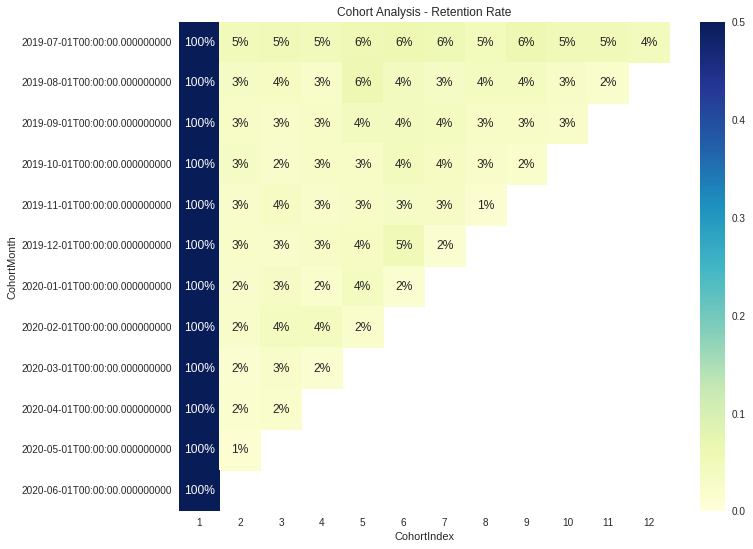

In [ ]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()

# **RF HEAT**

In [ ]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_rfm

,Recency,Frequency,Monetary
CustomerKey,,,
11000.0,256,3,8248.9900
11001.0,35,3,6383.8800
11002.0,325,3,8114.0400
11003.0,249,3,8139.2900
11004.0,258,3,8196.0100
...,...,...,...
29479.0,497,1,2049.0982
29480.0,181,1,2442.0300
29481.0,885,1,3374.9900


In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter


df_pareto = df_rfm.copy()

ls = df_merge.groupby(['CustomerKey']).agg({
     'Date': lambda x: (x.max() - x.min()).days + 1
     }
)


In [ ]:
df_pareto = df_pareto.merge(ls, on = 'CustomerKey')

In [ ]:
df_pareto = df_pareto.rename(columns = {'Date': 'LifeSpan'})

In [ ]:
#days to week
df_pareto['Recency'] = df_pareto['Recency'] / 7
df_pareto['LifeSpan'] = df_pareto['LifeSpan'] / 7

In [ ]:
df_pareto = df_pareto[df_pareto['Monetary'] > 0]
df_pareto['Monetary'] = df_pareto['Monetary'] / df_pareto['Frequency']
df_pareto = df_pareto[(df_pareto['Frequency'] > 1)]
df_pareto

,Recency,Frequency,Monetary,LifeSpan
CustomerKey,,,,
11000.0,36.571429,3,2749.663333,116.428571
11001.0,5.000000,3,2127.960000,148.428571
11002.0,46.428571,3,2704.680000,107.571429
11003.0,35.571429,3,2713.096667,119.000000
11004.0,36.857143,3,2732.003333,115.857143
...,...,...,...,...
29398.0,48.571429,2,1982.235000,95.428571
29399.0,44.285714,2,1968.235000,100.000000
29400.0,43.428571,2,1996.230000,97.285714


In [ ]:
rls = df_pareto[df_pareto['Recency']> df_pareto['LifeSpan']].index.array
df_pareto = df_pareto.drop(rls)

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(df_pareto['Frequency'], df_pareto['Recency'], df_pareto['LifeSpan'])

<lifetimes.BetaGeoFitter: fitted with 5753 subjects, a: 3.44, alpha: 5.96, b: 5.24, r: 1.29>

In [ ]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,1.292682,0.037760,1.218672,1.366692
alpha,5.962663,0.249285,5.474065,6.451262
a,3.436530,0.101119,3.238337,3.634723
b,5.242347,0.148272,4.951734,5.532961


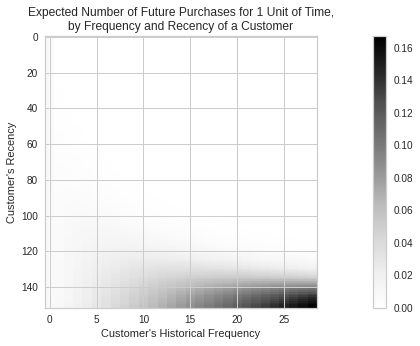

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf);

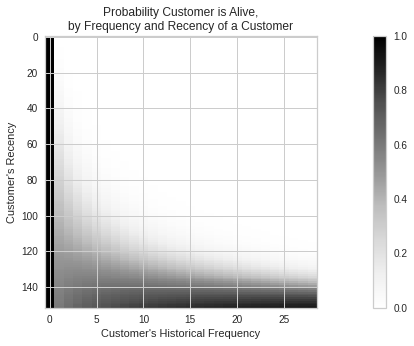

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)